In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import minimize
import math
import statistics
from scipy.stats import linregress

PARTE I: Calibración del interferómetro

In [7]:
num_lineas_m = [12,13,15,18,19,23]# ,34]  #igual a los datos, solo que de forma creciente. 
movi_micrometro = [2,4,6,8,10,13]# ,18]   #igual a los datos, pero sumativos.  Estas son las muesquitas que se movió
movi_micrometro_micro = [20,40,60,80,100,130]#,180] #micrómetros
movi_micrometro_metros = [n * 0.000001  for n in movi_micrometro_micro]  #movimiento micrómetro en metros 

Ahora, para la distancia entre los espejos usamos: 
\begin{equation}
m λ = 2 d
\end{equation}

Entonces:

\begin{equation}
d = \frac{m λ}{2}
\end{equation}

$λ Mercurio = 546,1 nm$

In [9]:
def separacion(m): #Función que devuelve d en metros, que corresponde al movimiento del espejo
  d = []
  for i in m:
    d.append((i*546.1*10**-9)/2)
  return d

distancia = separacion(num_lineas_m) #Movimiento del espejo metros

Para el ajuste lineal:

In [12]:
ajuste_1 = stats.linregress(movi_micrometro_metros, distancia)
t = np.linspace(0.000003, 0.000007, 100)
fit_1 = np.poly1d([ajuste_1[0], ajuste_1[1]])
ajuste_final= fit_1(t)  

In [ ]:
ajuste_1.slope

4.636335015938795

In [15]:
ajuste_1 = np.polyfit(movi_micrometro_metros, distancia,1)
t = np.linspace(0.000003, 0.000007, 100)
fit_1 = np.poly1d([ajuste_1[0], ajuste_1[1]])
ajuste_final = fit_1(t)

In [16]:
ajuste_1

array([ 2.14107171e-01, -6.22946407e-07])

Para la gráfica:

<ipython-input-31-5fbef44066c3>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.errorbar(distancia,movi_micrometro_metros, yerr = 5*10**-6 , color = 'indigo',fmt='bo',ms = 6, capsize = 3,\


[]

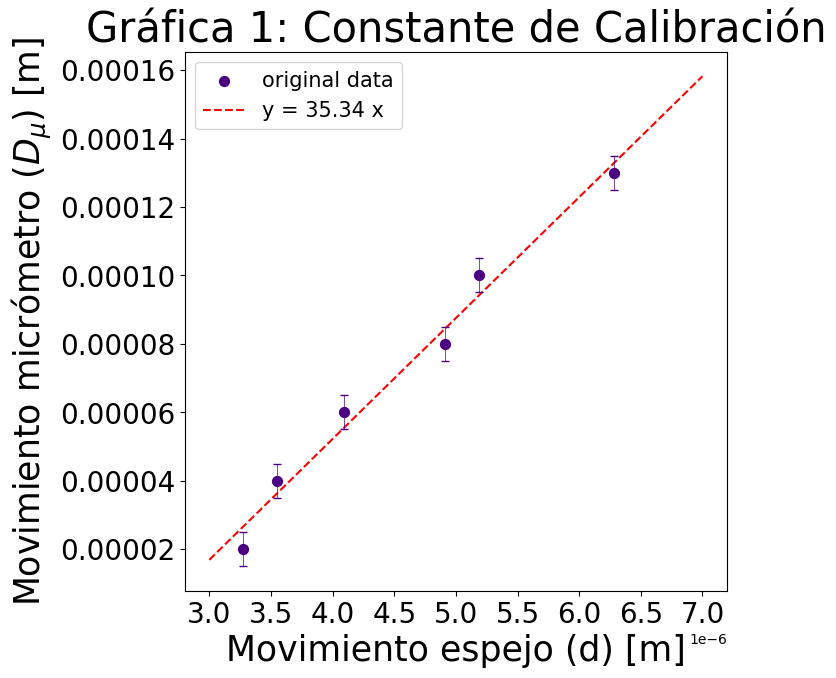

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(distancia, movi_micrometro_metros, s= 50, color = 'indigo', label = 'original data')
ax.plot(t, ajuste_final, color = 'red', linestyle= '--', label = ('y = 35.34 x '))
ax.errorbar(distancia,movi_micrometro_metros, yerr = 5*10**-6 , color = 'indigo',fmt='bo',ms = 6, capsize = 3,\
            elinewidth = 0.5)
ax.set_xlabel('Movimiento espejo (d) [m]', fontsize = 25)
ax.set_ylabel('Movimiento micrómetro ($D_\mu)$ [m]', fontsize = 25)
ax.set_title('Gráfica 1: Constante de Calibración', fontsize = 30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
ax.legend(markerscale = 1, fontsize = 15)
plt.plot()

Entonc$\eta$ Será la pendiente a la menos 1, debido a que es un factor de reducción:

In [8]:
num_lineas_m = [12,23,31,34,46,59,77]# ,34]  #igual a los datos, solo que de forma creciente. 
movi_micrometro = [2,4,6,8,10,13]# ,18]   #igual a los datos, pero sumativos.  Estas son las muesquitas que se movió
movi_micrometro_micro = [20, 30, 40, 50, 60, 80, 100]#,180] #micrómetros
movi_micrometro_metros = [n * 0.000001  for n in movi_micrometro_micro]  #movimiento micrómetro en metros 

In [ ]:
ajuste_1 = stats.linregress(distancia,movi_micrometro_metros)
t = np.linspace(0.000003, 0.00002, 100)
fit_1 = np.poly1d([ajuste_1[0], ajuste_1[1]])
ajuste_final= fit_1(t)

In [ ]:
def separacion (m): #Función que devuelve d en metros, que corresponde al movimiento del espejo
  d = []
  for i in m:
    d.append((i*546.1*10**-9)/2)
  return d

distancia = separacion(num_lineas_m) #Movimiento del espejo metros

<ipython-input-22-5fbef44066c3>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.errorbar(distancia,movi_micrometro_metros, yerr = 5*10**-6 , color = 'indigo',fmt='bo',ms = 6, capsize = 3,\


[]

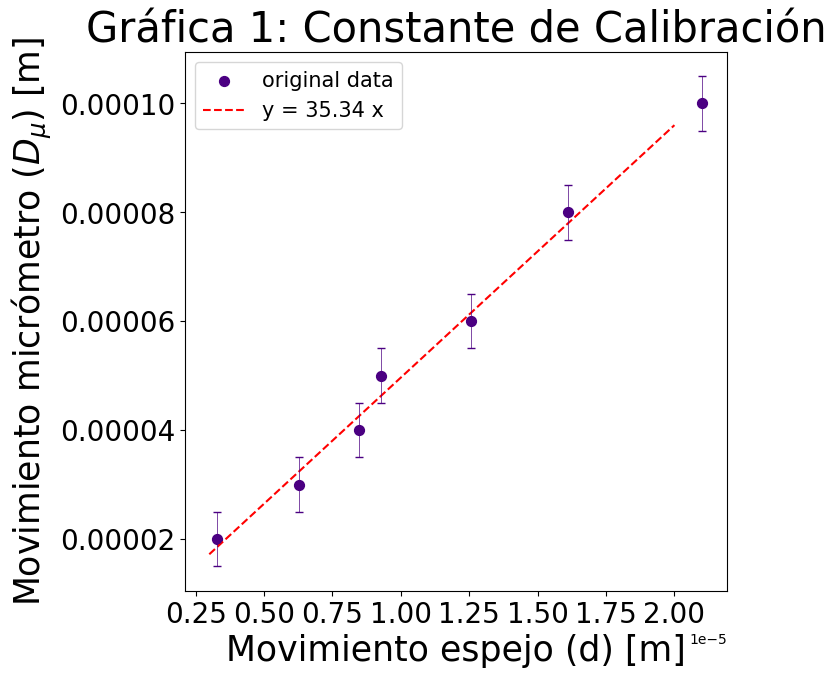

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(distancia, movi_micrometro_metros, s= 50, color = 'indigo', label = 'original data')
ax.plot(t, ajuste_final, color = 'red', linestyle= '--', label = ('y = 35.34 x '))
ax.errorbar(distancia,movi_micrometro_metros, yerr = 5*10**-6 , color = 'indigo',fmt='bo',ms = 6, capsize = 3,\
            elinewidth = 0.5)
ax.set_xlabel('Movimiento espejo (d) [m]', fontsize = 25)
ax.set_ylabel('Movimiento micrómetro ($D_\mu)$ [m]', fontsize = 25)
ax.set_title('Gráfica 1: Constante de Calibración', fontsize = 30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
ax.legend(markerscale = 1, fontsize = 15)
plt.plot()

In [ ]:
ajuste_1.slope

4.636335015938795

In [ ]:
1/ajuste_1.slope

0.21568760595647196

In [ ]:
ajuste_1.stderr

0.17814045694394104

In [ ]:
(1/ajuste_1).stderr

TypeError: ignored

In [ ]:
Parte ll

In [ ]:
d = [0  , 880 , 3300, 4180,6380]*10^-6   #Dmu*0.22; eje y; metros
x = [1/2, 3/2 , 5/2 ,7/2, 9/2]